# Task 8

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

For a set of `bank_data.csv`, build a decision tree model. Evaluate this model.


## Preparing the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank_data.csv to bank_data.csv


In [ ]:
data = pd.read_csv("bank_data.csv")
data

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,29,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,46208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,46209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,46210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
data.drop("Id", axis=1, inplace=True)

In [ ]:
data.isnull().sum() # there are no NaN values

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
numeric_columns = data.select_dtypes(include=['number']).columns
numeric_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [ ]:
label_columns = data.select_dtypes(include=['object']).columns
label_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [ ]:
len(numeric_columns)+len(label_columns)==data.shape[1]

True

We have to transform these "text" variables into a numerical form. For that, we use `LabelEncoder`

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

for col in label_columns:
    le = preprocessing.LabelEncoder()
    data[col] = le.fit_transform(data[col])
    l = list(le.classes_)

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,29,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [ ]:
data.y.value_counts(normalize=True)

,proportion
y,
0,0.882927
1,0.117073


## Applying the model

In [ ]:
X = data.drop(['y'], axis=1)
y = data['y'] # target variable

### Train/Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# to check the proportion is still ok
print(y.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

y
0    0.882927
1    0.117073
Name: proportion, dtype: float64
y
0    0.883833
1    0.116167
Name: proportion, dtype: float64
y
0    0.880209
1    0.119791
Name: proportion, dtype: float64


### Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

### Prediction

In [ ]:
pred = model.predict(X_test)
pred[:5]

array([0, 0, 0, 0, 0])

### Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[9214,  735],
       [ 685,  669]])

In [ ]:
# this gives all possible outputs of the model
model.classes_

array([0, 1])

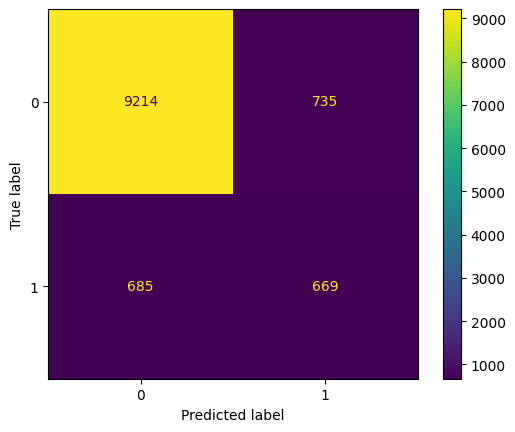

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8743696363797222

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(tn, fp, fn, tp)

9214 735 685 669


### Visualization

In [ ]:
from sklearn import tree

features = ['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing', 'Loan',
            'Contact', 'Day', 'Month', 'Duration', 'Campaign', 'pdays', 'Previous', 'poutcome']  # names of our variables
#tree.plot_tree(model_01, feature_names=features) # silhouette of the tree

**DON'T RUN THE FOLLOWING:**

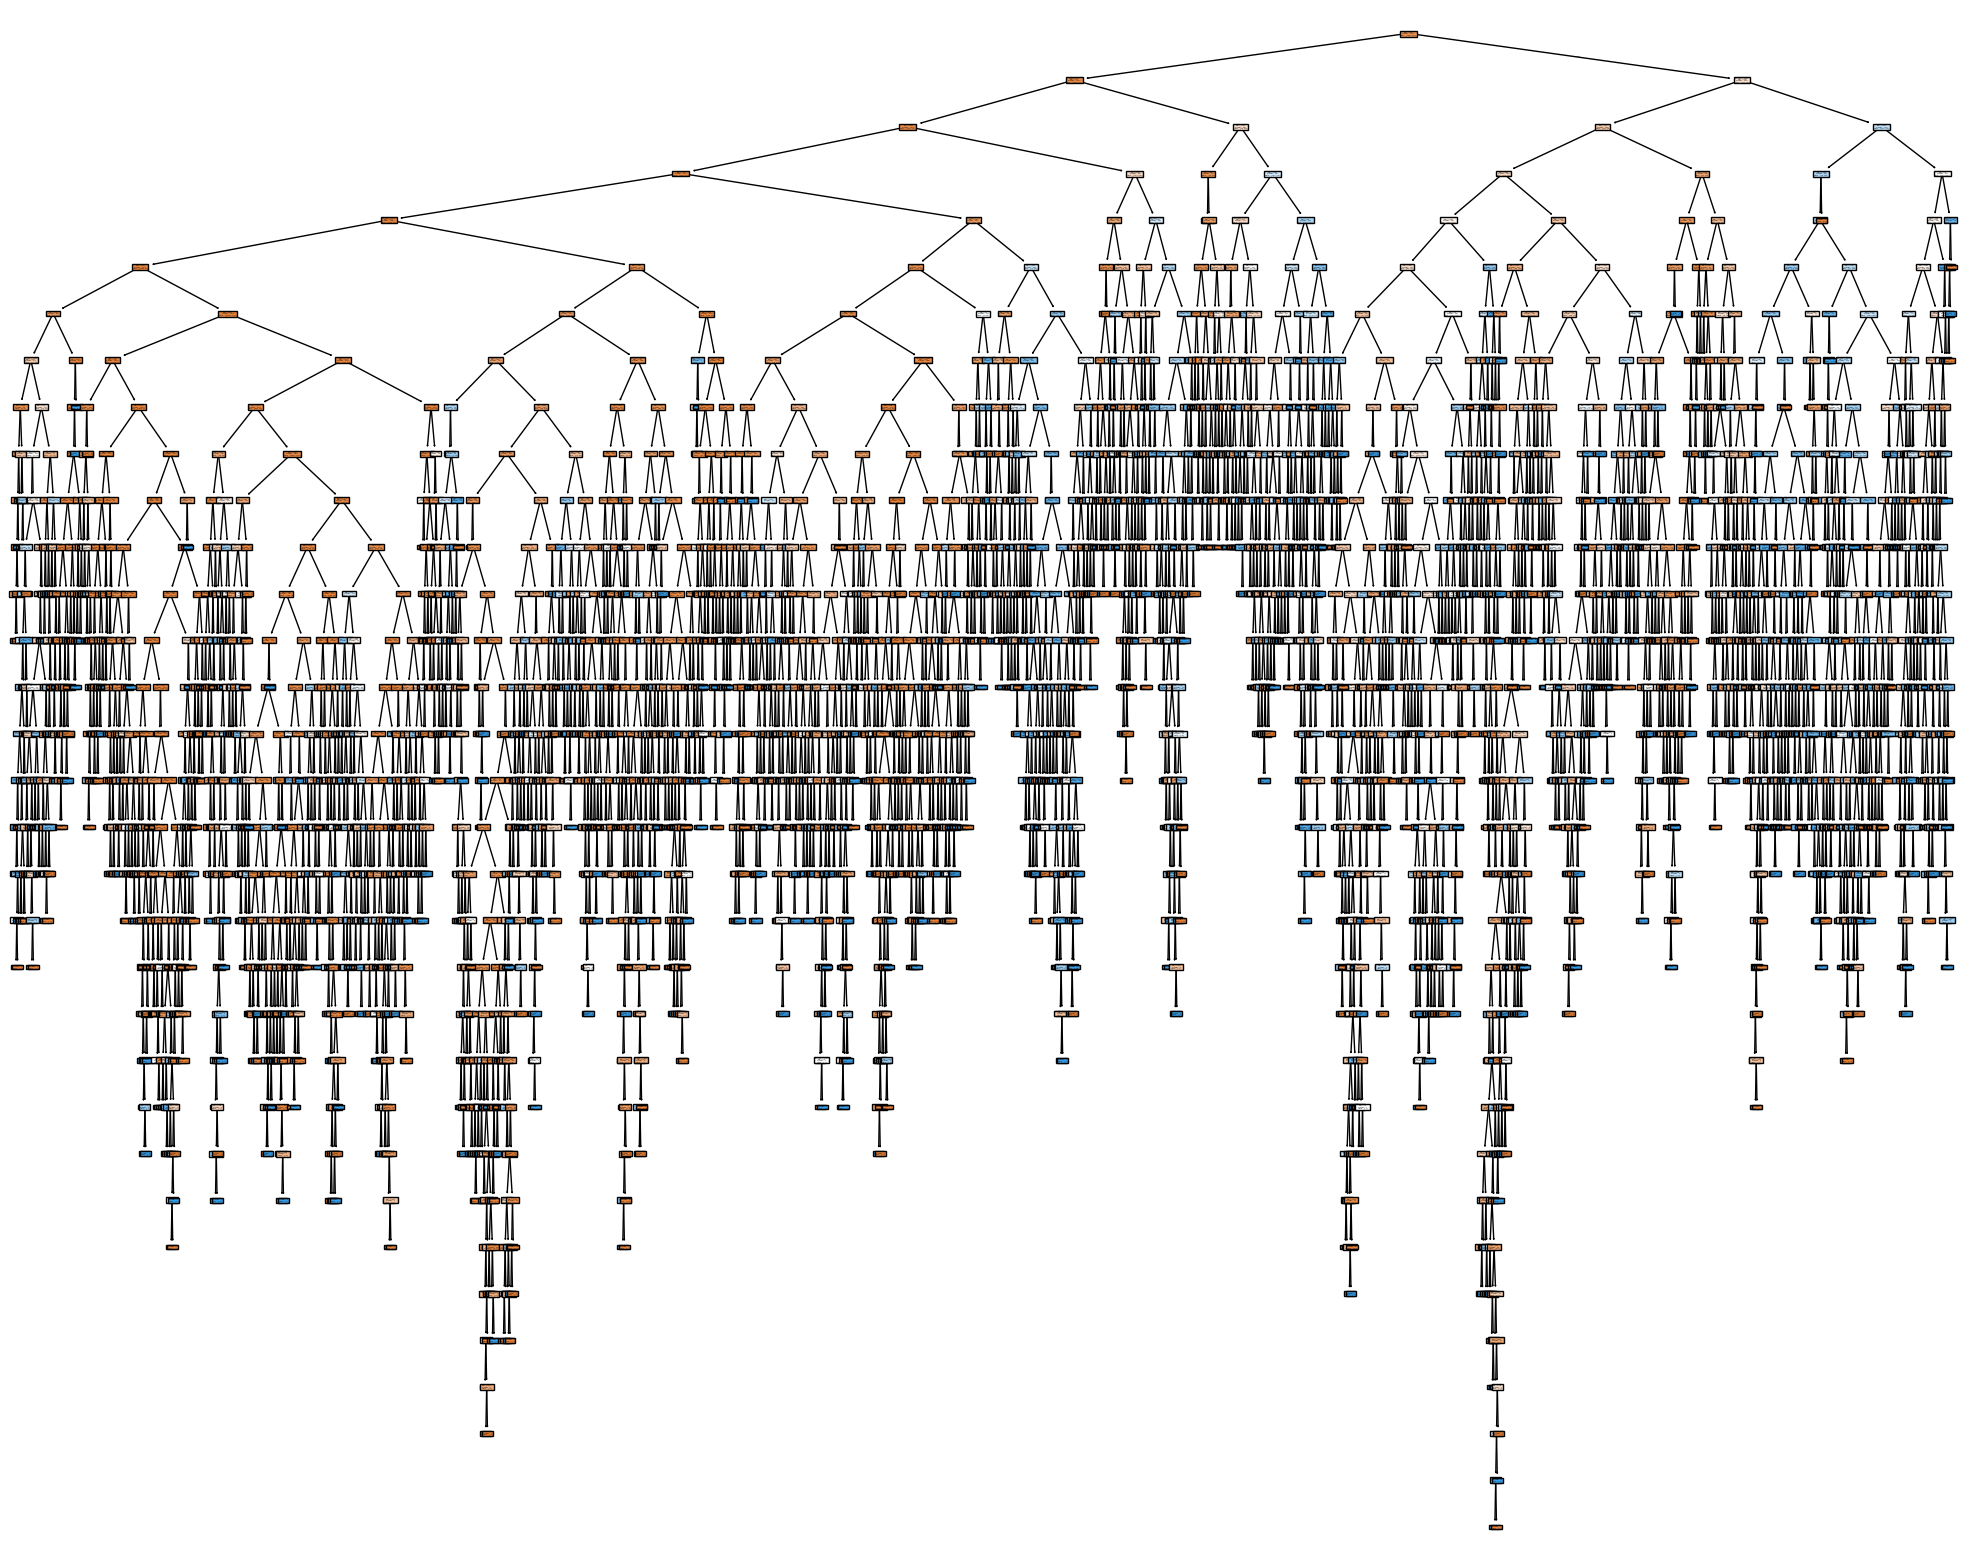

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=features,
                   filled=True)

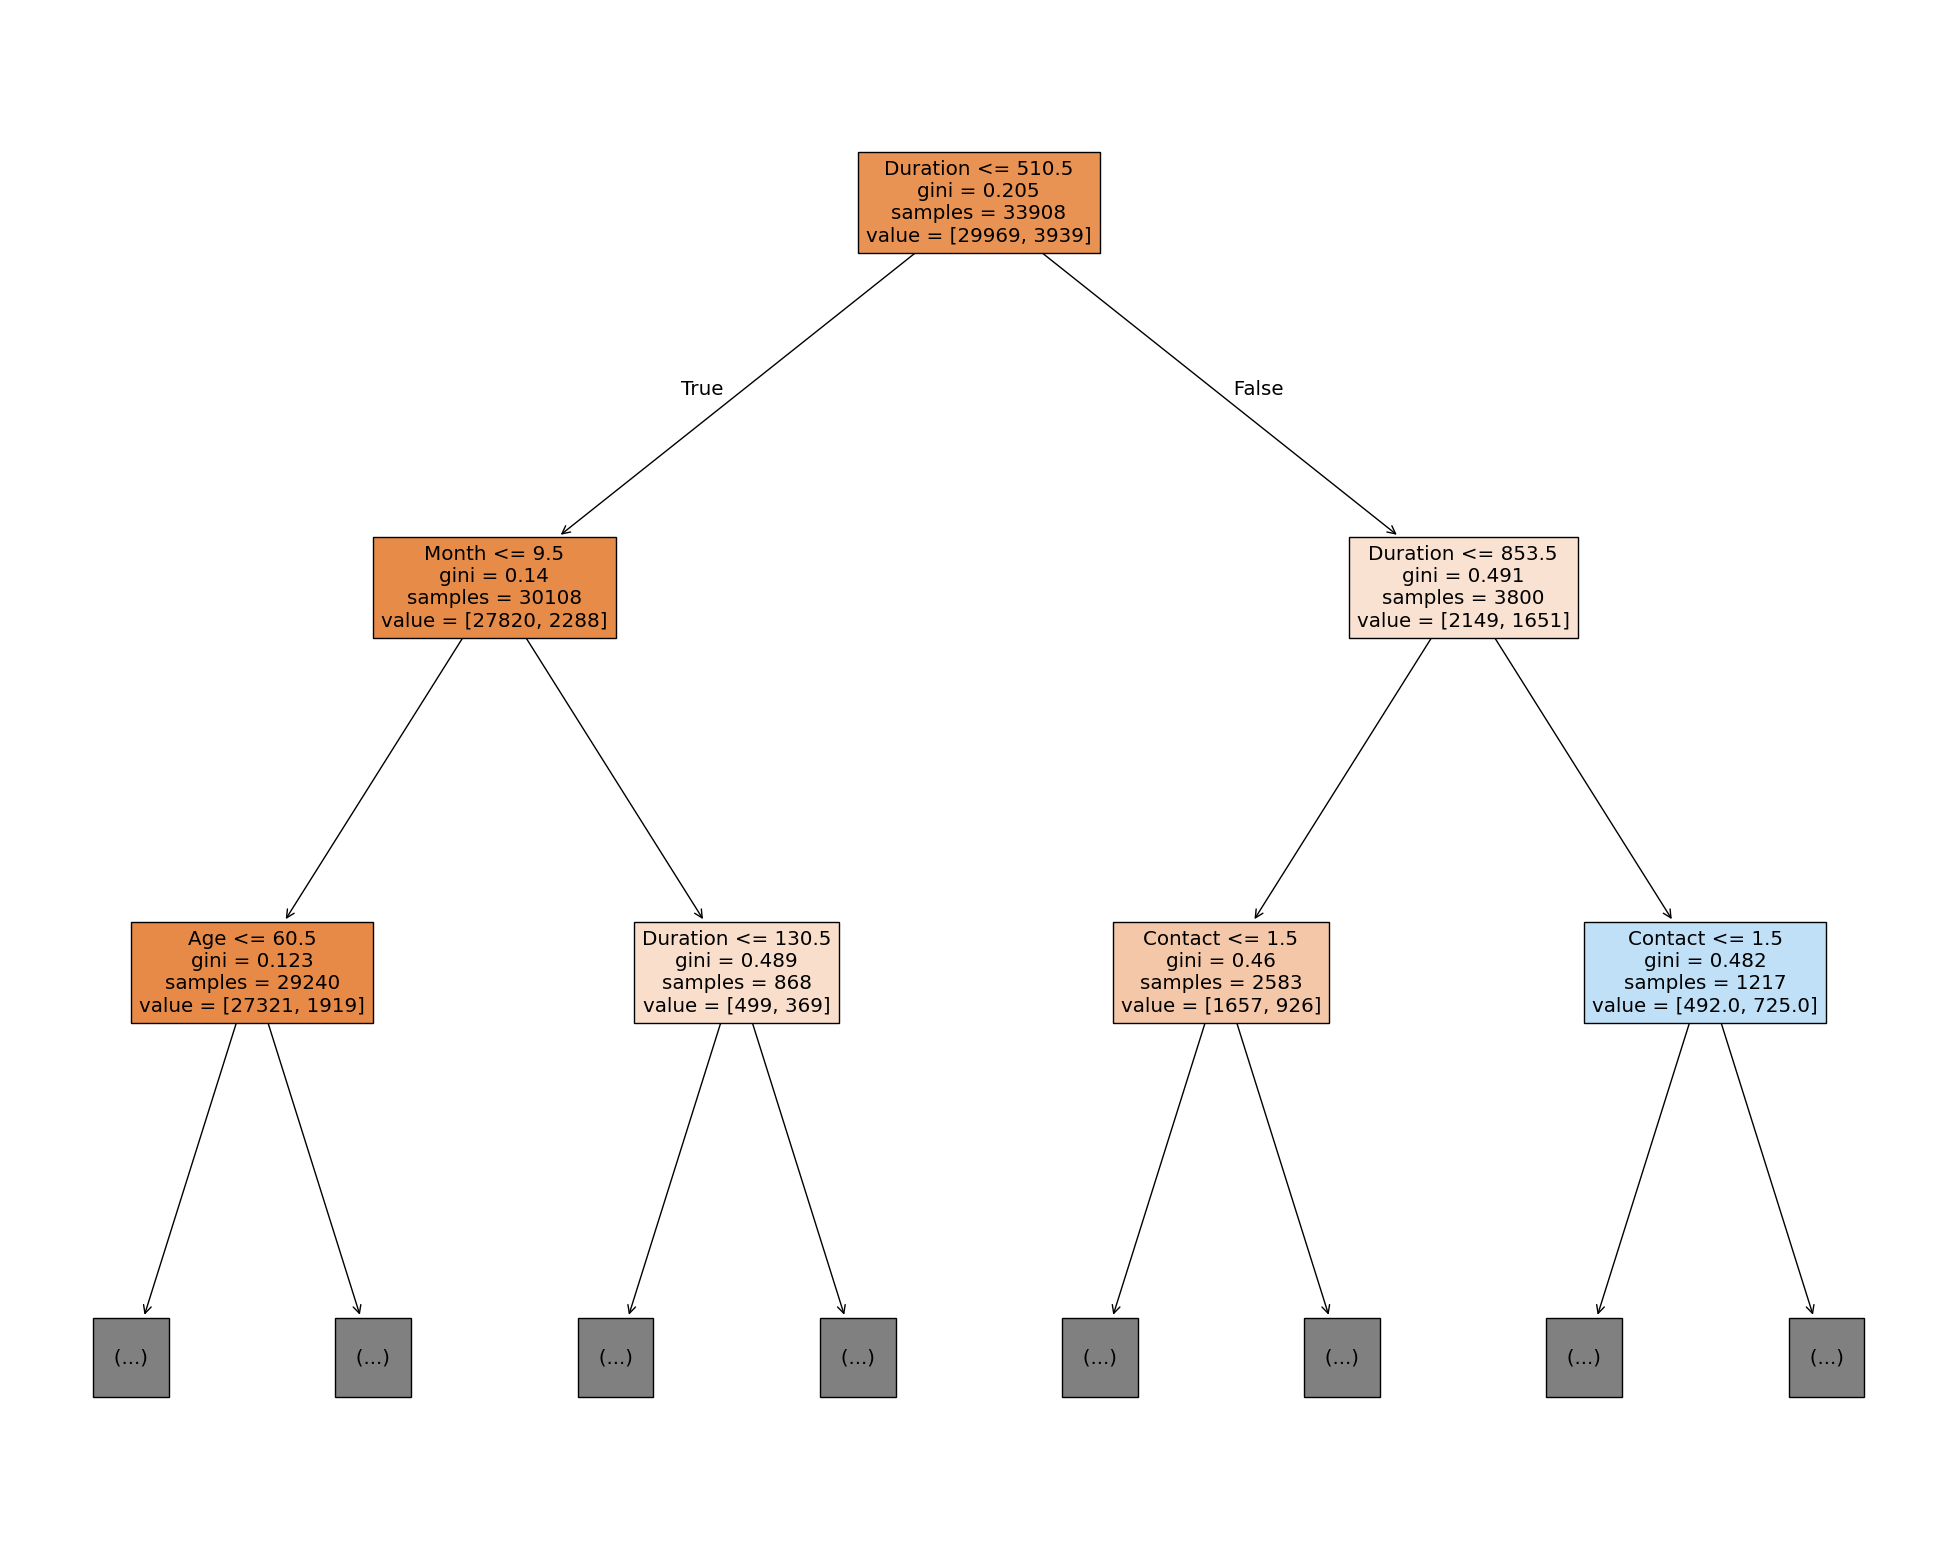

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=features,
                   max_depth=2,
                   filled=True)

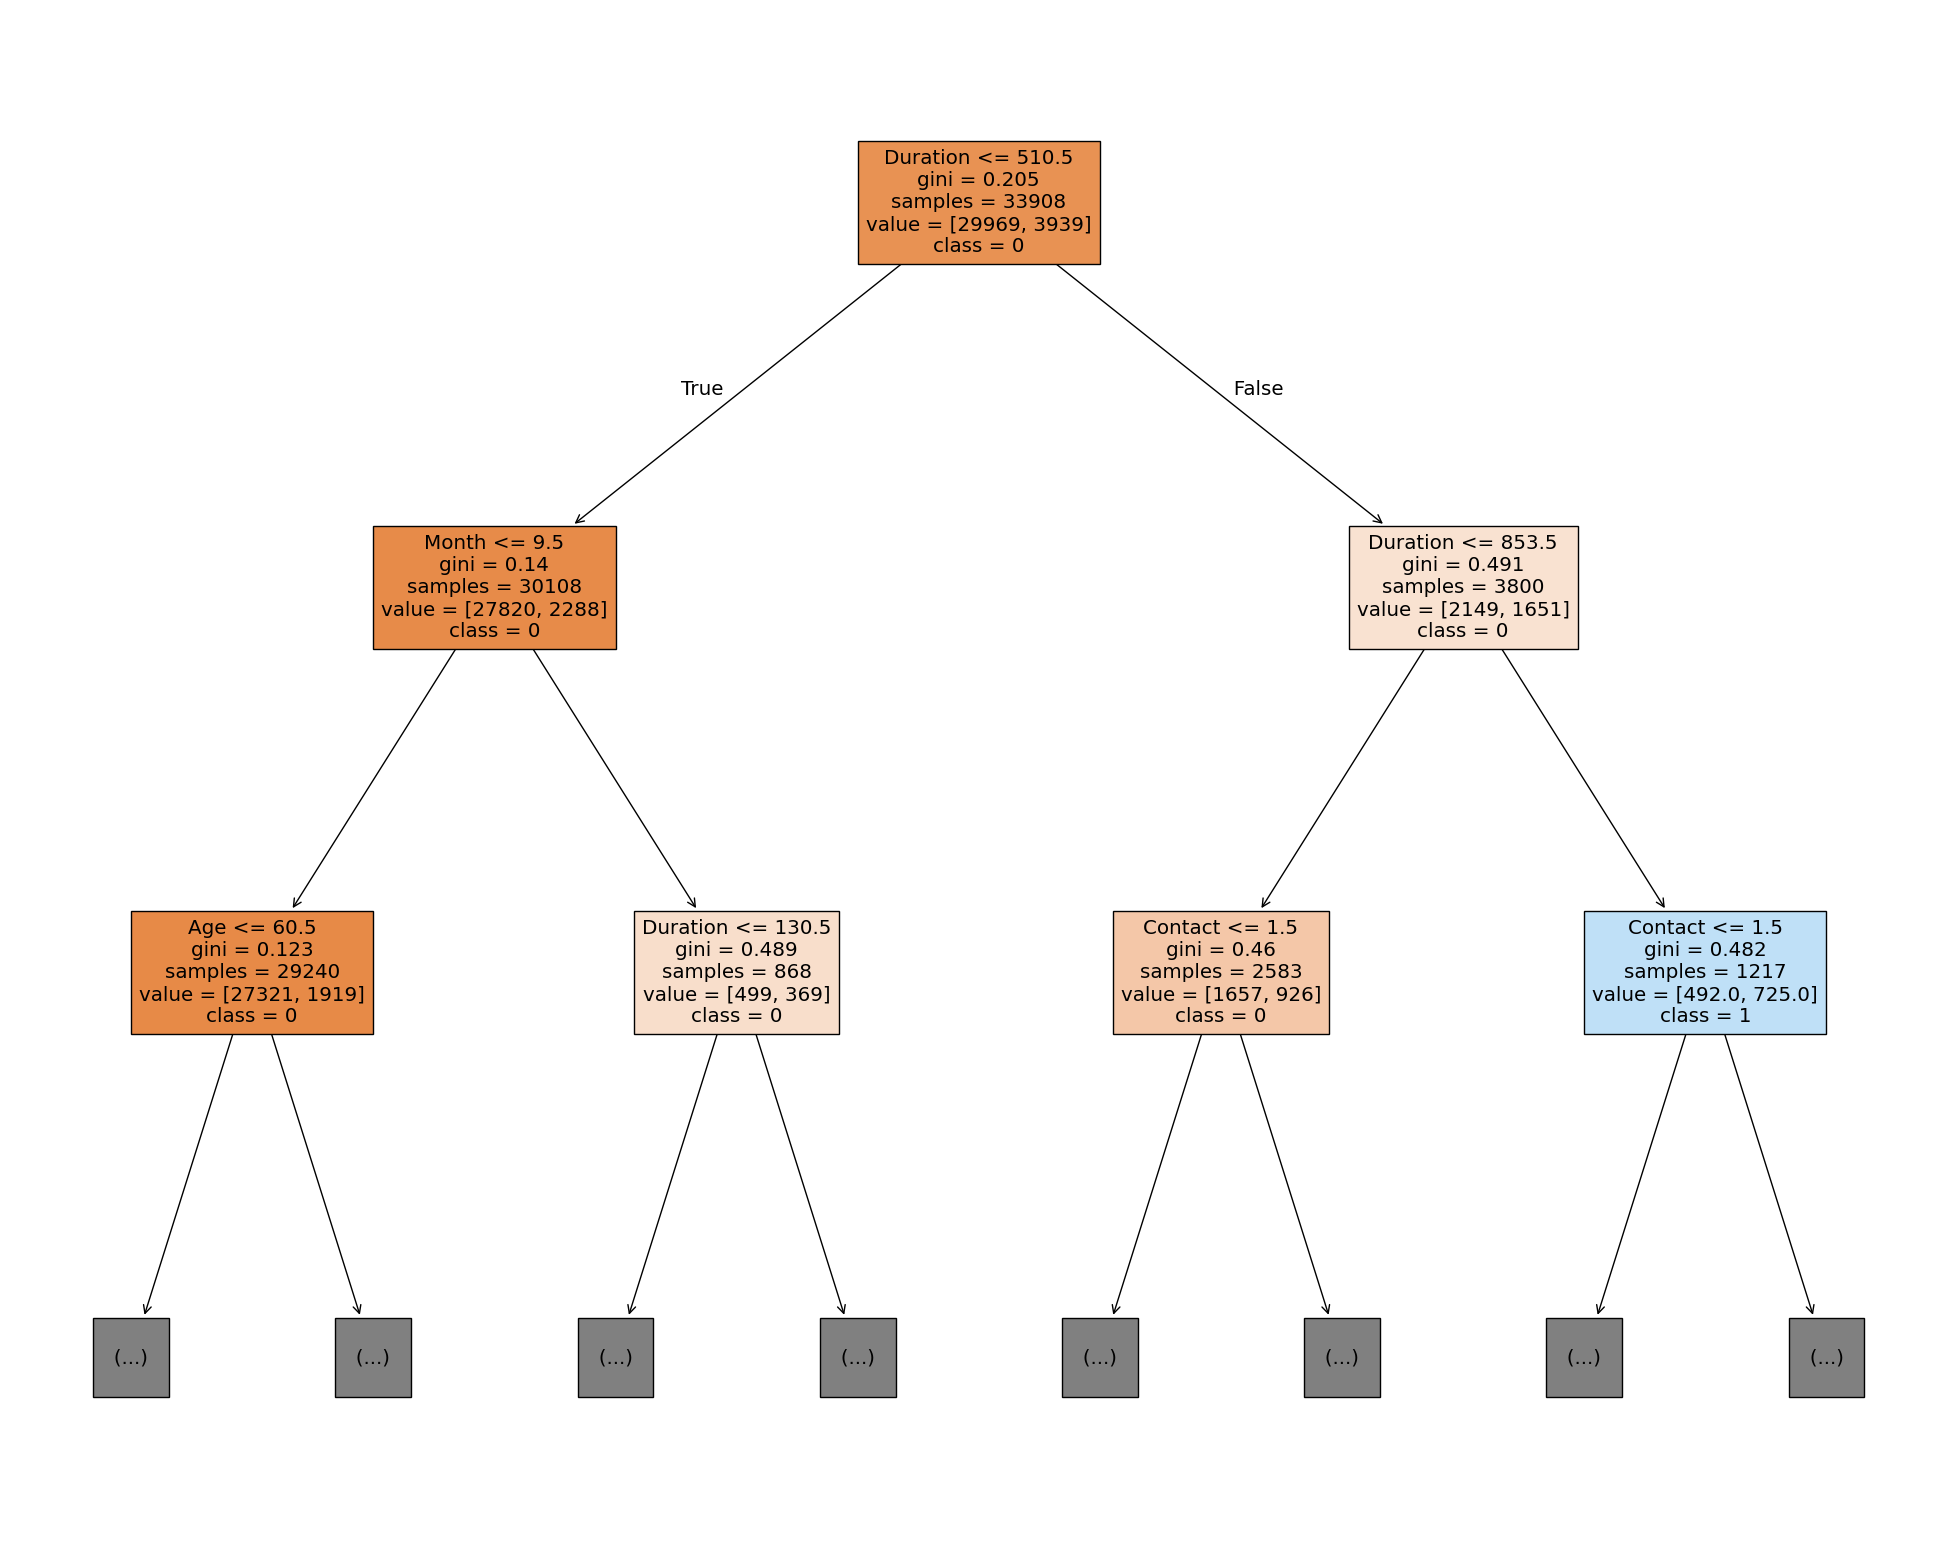

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=features,
                   max_depth=2,
                   class_names=['0', '1'],
                   filled=True)

In [ ]:
text_tree = tree.export_text(model,
                             feature_names=features,
                             max_depth=2)
print(text_tree)

|--- Duration <= 510.50
|   |--- Month <= 9.50
|   |   |--- Age <= 60.50
|   |   |   |--- truncated branch of depth 28
|   |   |--- Age >  60.50
|   |   |   |--- truncated branch of depth 19
|   |--- Month >  9.50
|   |   |--- Duration <= 130.50
|   |   |   |--- truncated branch of depth 9
|   |   |--- Duration >  130.50
|   |   |   |--- truncated branch of depth 17
|--- Duration >  510.50
|   |--- Duration <= 853.50
|   |   |--- Contact <= 1.50
|   |   |   |--- truncated branch of depth 29
|   |   |--- Contact >  1.50
|   |   |   |--- truncated branch of depth 17
|   |--- Duration >  853.50
|   |   |--- Contact <= 1.50
|   |   |   |--- truncated branch of depth 22
|   |   |--- Contact >  1.50
|   |   |   |--- truncated branch of depth 19



### Importance of variables

In [ ]:
model.feature_importances_

array([0.10814315, 0.04483615, 0.01862957, 0.02468812, 0.00298867,
       0.11189193, 0.02106912, 0.00786044, 0.02140132, 0.08087298,
       0.10704519, 0.29102123, 0.03240097, 0.05816609, 0.01717766,
       0.05180741])

In [ ]:
len(model.feature_importances_)

16

Text(0, 0.5, 'Variable')

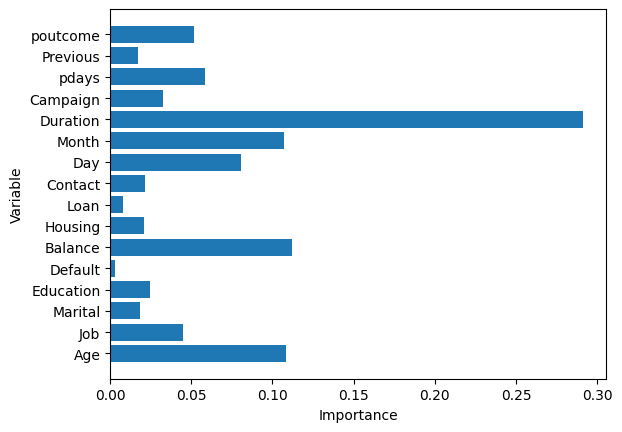

In [ ]:
plt.barh(range(len(model.feature_importances_)), list(model.feature_importances_), align='center')
plt.yticks(np.arange(len(model.feature_importances_)), features)
plt.xlabel("Importance")
plt.ylabel("Variable")